In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/train.csv')


In [2]:
print(df.head().to_markdown(index=False,numalign='left', stralign='left'))

| Id   | MSSubClass   | MSZoning   | LotFrontage   | LotArea   | Street   | Alley   | LotShape   | LandContour   | Utilities   | LotConfig   | LandSlope   | Neighborhood   | Condition1   | Condition2   | BldgType   | HouseStyle   | OverallQual   | OverallCond   | YearBuilt   | YearRemodAdd   | RoofStyle   | RoofMatl   | Exterior1st   | Exterior2nd   | MasVnrType   | MasVnrArea   | ExterQual   | ExterCond   | Foundation   | BsmtQual   | BsmtCond   | BsmtExposure   | BsmtFinType1   | BsmtFinSF1   | BsmtFinType2   | BsmtFinSF2   | BsmtUnfSF   | TotalBsmtSF   | Heating   | HeatingQC   | CentralAir   | Electrical   | 1stFlrSF   | 2ndFlrSF   | LowQualFinSF   | GrLivArea   | BsmtFullBath   | BsmtHalfBath   | FullBath   | HalfBath   | BedroomAbvGr   | KitchenAbvGr   | KitchenQual   | TotRmsAbvGrd   | Functional   | Fireplaces   | FireplaceQu   | GarageType   | GarageYrBlt   | GarageFinish   | GarageCars   | GarageArea   | GarageQual   | GarageCond   | PavedDrive   | WoodDeckSF   | OpenPorchSF 

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
print(df.describe().to_markdown())

|       |      Id |   MSSubClass |   LotFrontage |   LotArea |   OverallQual |   OverallCond |   YearBuilt |   YearRemodAdd |   MasVnrArea |   BsmtFinSF1 |   BsmtFinSF2 |   BsmtUnfSF |   TotalBsmtSF |   1stFlrSF |   2ndFlrSF |   LowQualFinSF |   GrLivArea |   BsmtFullBath |   BsmtHalfBath |    FullBath |    HalfBath |   BedroomAbvGr |   KitchenAbvGr |   TotRmsAbvGrd |   Fireplaces |   GarageYrBlt |   GarageCars |   GarageArea |   WoodDeckSF |   OpenPorchSF |   EnclosedPorch |   3SsnPorch |   ScreenPorch |   PoolArea |   MiscVal |     MoSold |    YrSold |   SalePrice |
|:------|--------:|-------------:|--------------:|----------:|--------------:|--------------:|------------:|---------------:|-------------:|-------------:|-------------:|------------:|--------------:|-----------:|-----------:|---------------:|------------:|---------------:|---------------:|------------:|------------:|---------------:|---------------:|---------------:|-------------:|--------------:|-------------:|---------

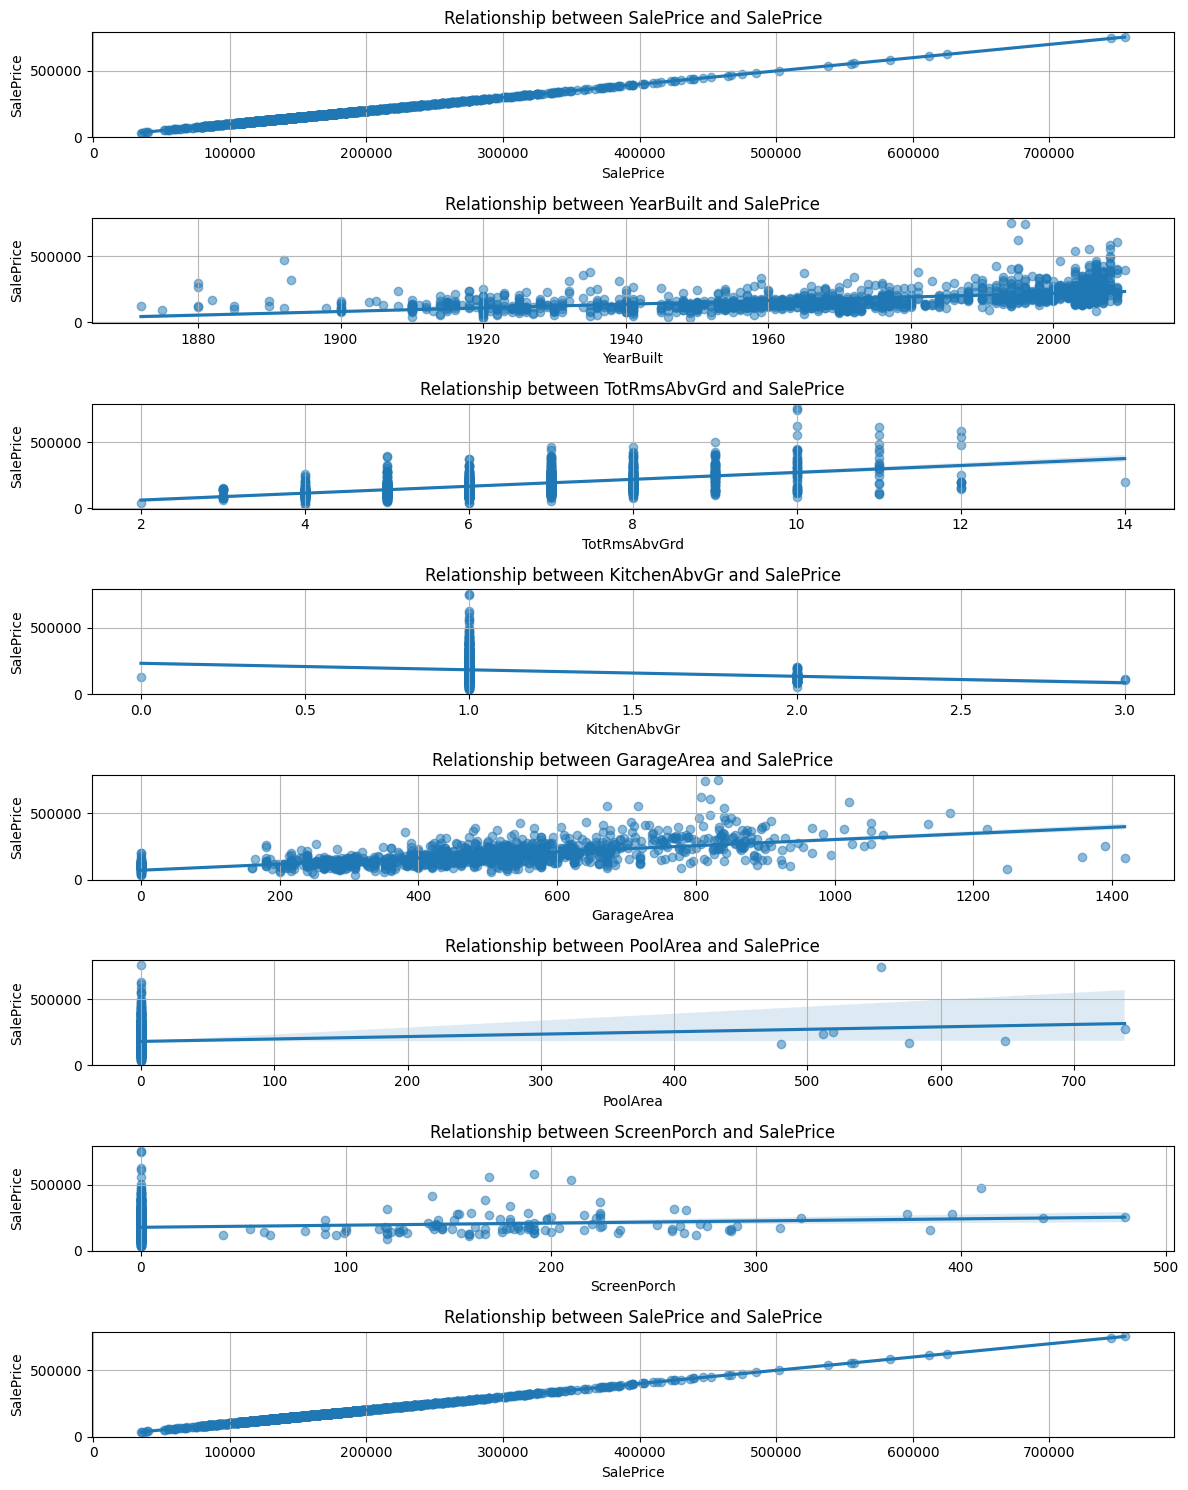

NameError: name 'coefficients' is not defined

<Figure size 1000x8000 with 0 Axes>

In [11]:
# Define features of interest
features_to_plot = ['SalePrice', 'YearBuilt', 'TotRmsAbvGrd', 'KitchenAbvGr', 'GarageArea','PoolArea','ScreenPorch','SalePrice']  # Add more as needed

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(12, 15))

for i, feature in enumerate(features_to_plot):
    # Create a scatter plot for the current feature
    axes[i].scatter(df[feature], df['SalePrice'], alpha=0.5)

    # Add regression line
    sns.regplot(x=df[feature], y=df['SalePrice'], scatter=False, ax=axes[i])

    # Add labels and title
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f'Relationship between {feature} and SalePrice')
    axes[i].grid(axis='both', alpha=0.9)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,80))
sns.scatterplot(data=coefficients, x='feature', y='SalePrice', s=100) # s controls the size of the dots
plt.title('Feature Importance (Absolute Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', alpha=0.75)
plt.show()

In [8]:
#Visualize feature importance
plt.figure(figsize=(10,80))
sns.scatterplot(data=coefficients, x='Coefficient', y='Feature', s=100) # s controls the size of the dots
plt.title('Feature Importance (Absolute Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', alpha=0.75)
plt.show()

NameError: name 'coefficients' is not defined

<Figure size 1000x8000 with 0 Axes>

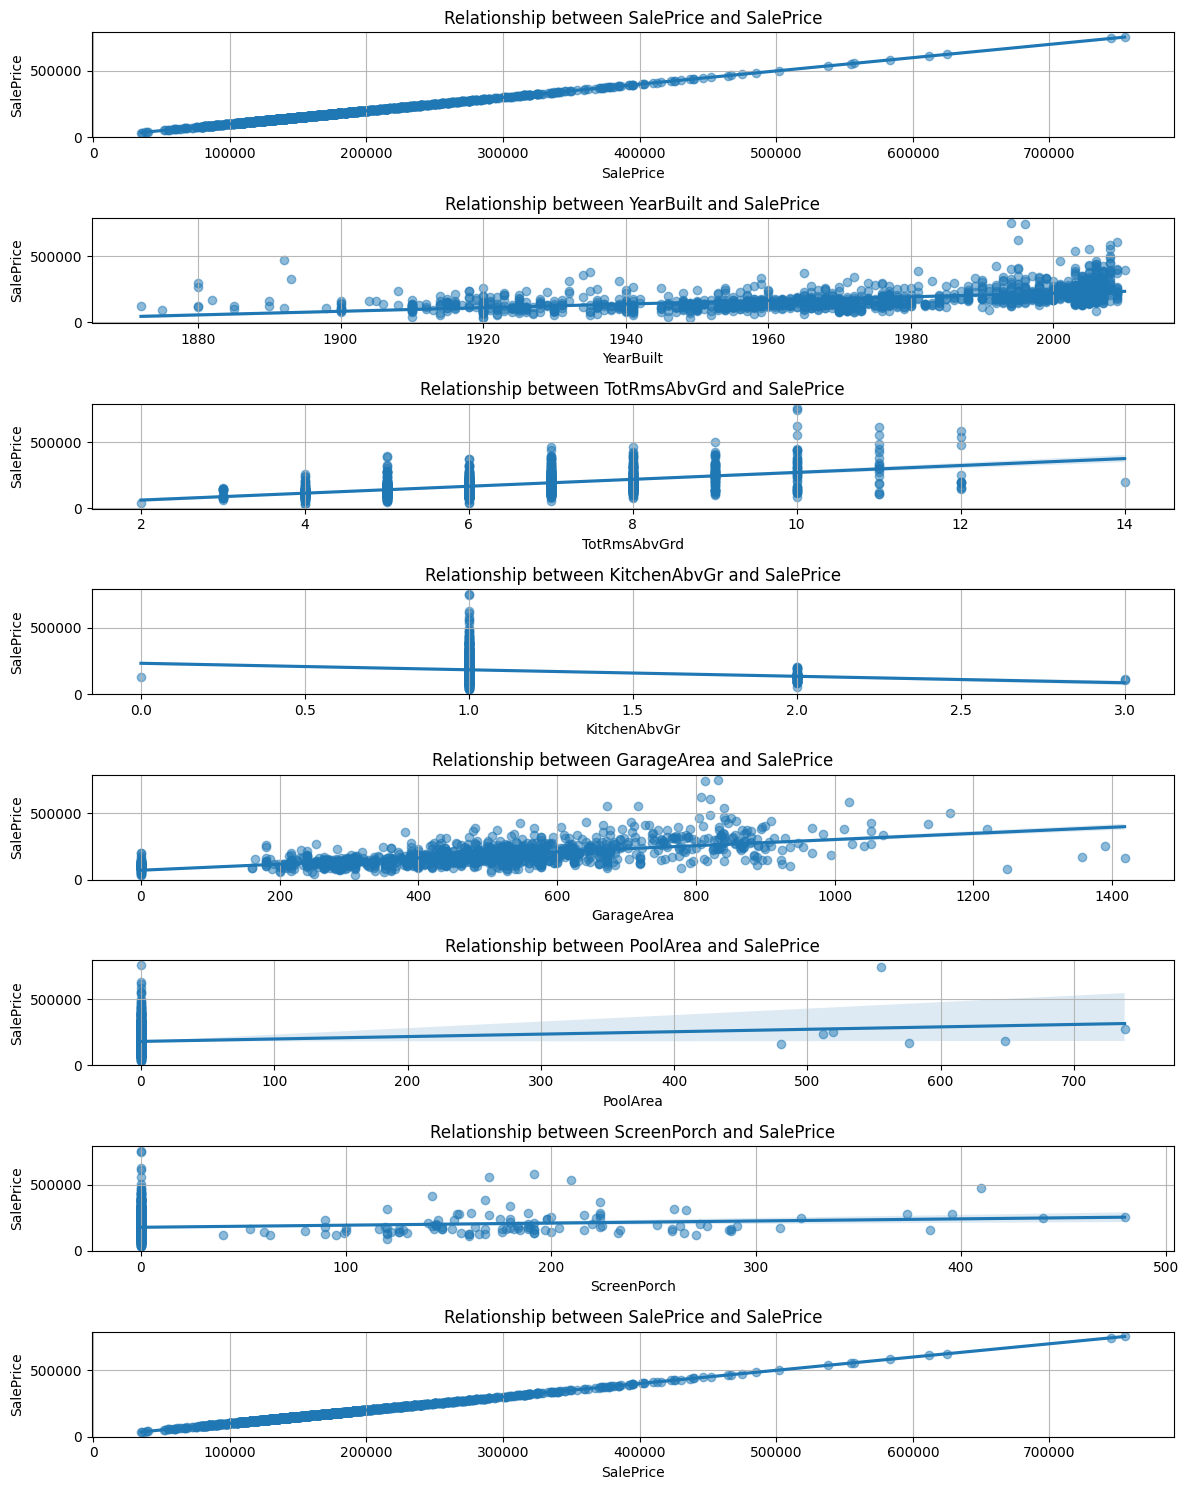

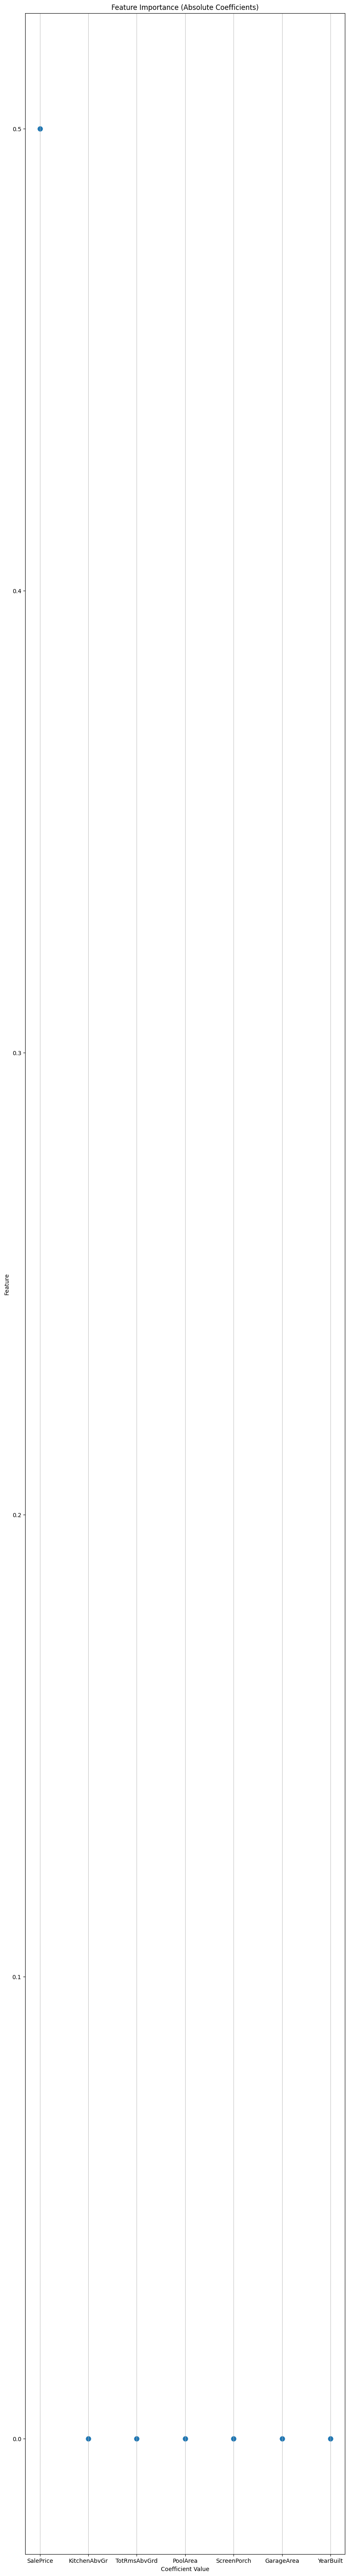

In [12]:
# Define features of interest
features_to_plot = ['SalePrice', 'YearBuilt', 'TotRmsAbvGrd', 'KitchenAbvGr', 'GarageArea','PoolArea','ScreenPorch','SalePrice']  # Add more as needed

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(12, 15))

for i, feature in enumerate(features_to_plot):
    # Create a scatter plot for the current feature
    axes[i].scatter(df[feature], df['SalePrice'], alpha=0.5)

    # Add regression line
    sns.regplot(x=df[feature], y=df['SalePrice'], scatter=False, ax=axes[i])

    # Add labels and title
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f'Relationship between {feature} and SalePrice')
    axes[i].grid(axis='both', alpha=0.9)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# --- Calculate Coefficients Here ---
# Example using Linear Regression (replace 'RelevantFeatures' with your actual feature columns)
X = df[['SalePrice', 'YearBuilt', 'TotRmsAbvGrd', 'KitchenAbvGr', 'GarageArea','PoolArea','ScreenPorch','SalePrice']]
y = df['SalePrice']
model = LinearRegression()
model.fit(X, y)
coefficients = pd.DataFrame({
    'feature': X.columns,
    'SalePrice': model.coef_
}).sort_values(by='SalePrice', key=abs, ascending=False)
# --- End of Coefficient Calculation ---

plt.figure(figsize=(10,80))
sns.scatterplot(data=coefficients, x='feature', y='SalePrice', s=100) # s controls the size of the dots
plt.title('Feature Importance (Absolute Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', alpha=0.75)
plt.show()

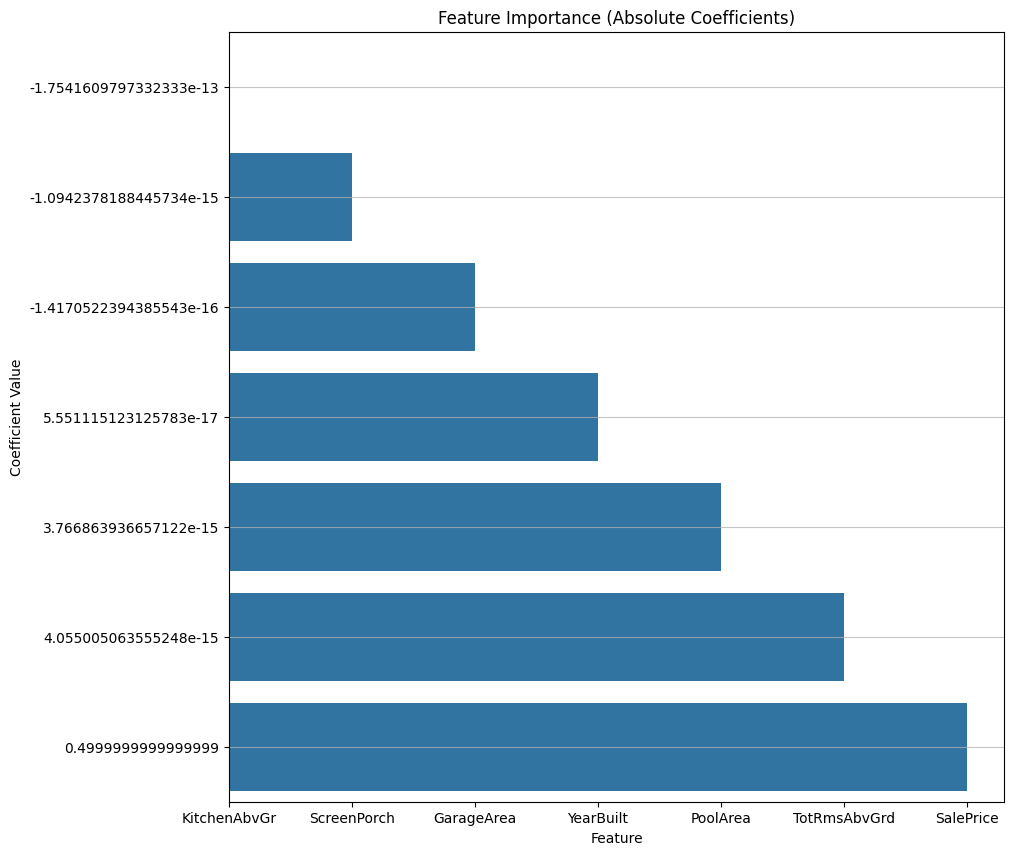

In [15]:
#Visualize feature importance
plt.figure(figsize=(10,10))
sns.barplot(data=coefficients, y='SalePrice', x='feature', orient='h') # Changed 'Feature' to 'feature'
plt.title('Feature Importance (Absolute Coefficients)')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.grid(axis='y', alpha=0.75)
plt.show()

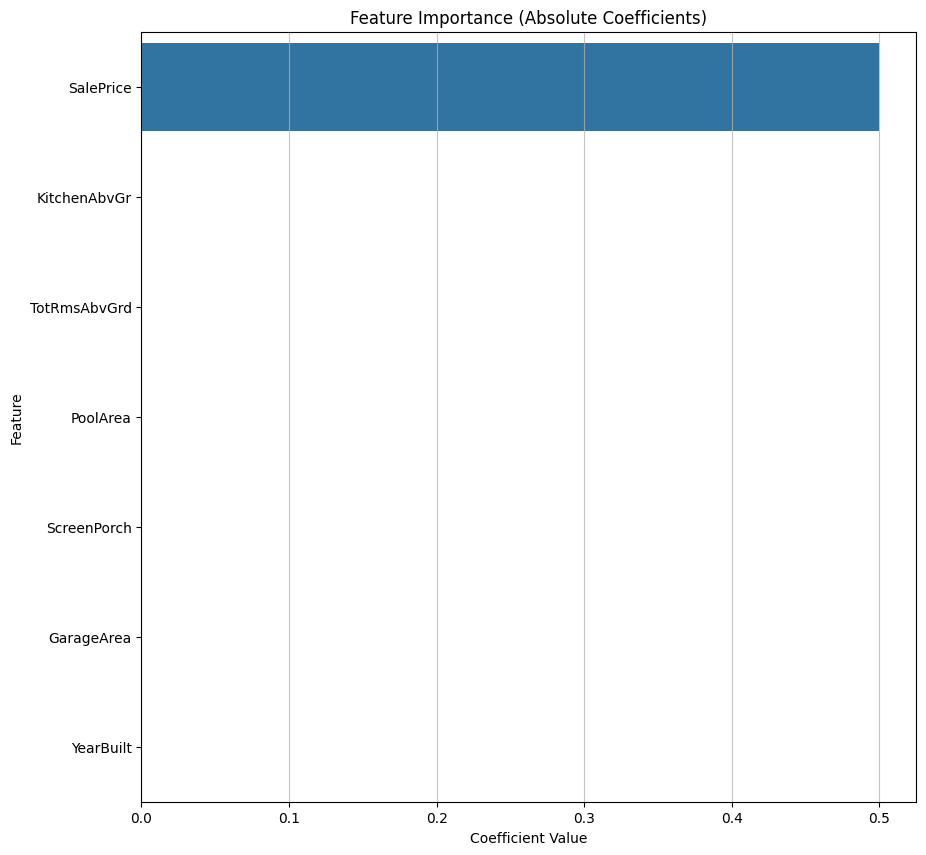

In [16]:
# Visualize feature importance
plt.figure(figsize=(10,10))
sns.barplot(data=coefficients, y='feature', x='SalePrice', orient='h')  # Flipped x and y for horizontal orientation
plt.title('Feature Importance (Absolute Coefficients)')
plt.xlabel('Coefficient Value')  # Swapped x and y labels for clarity
plt.ylabel('Feature')
plt.grid(axis='x', alpha=0.75)  # Grid on the x-axis for horizontal bars
plt.show()

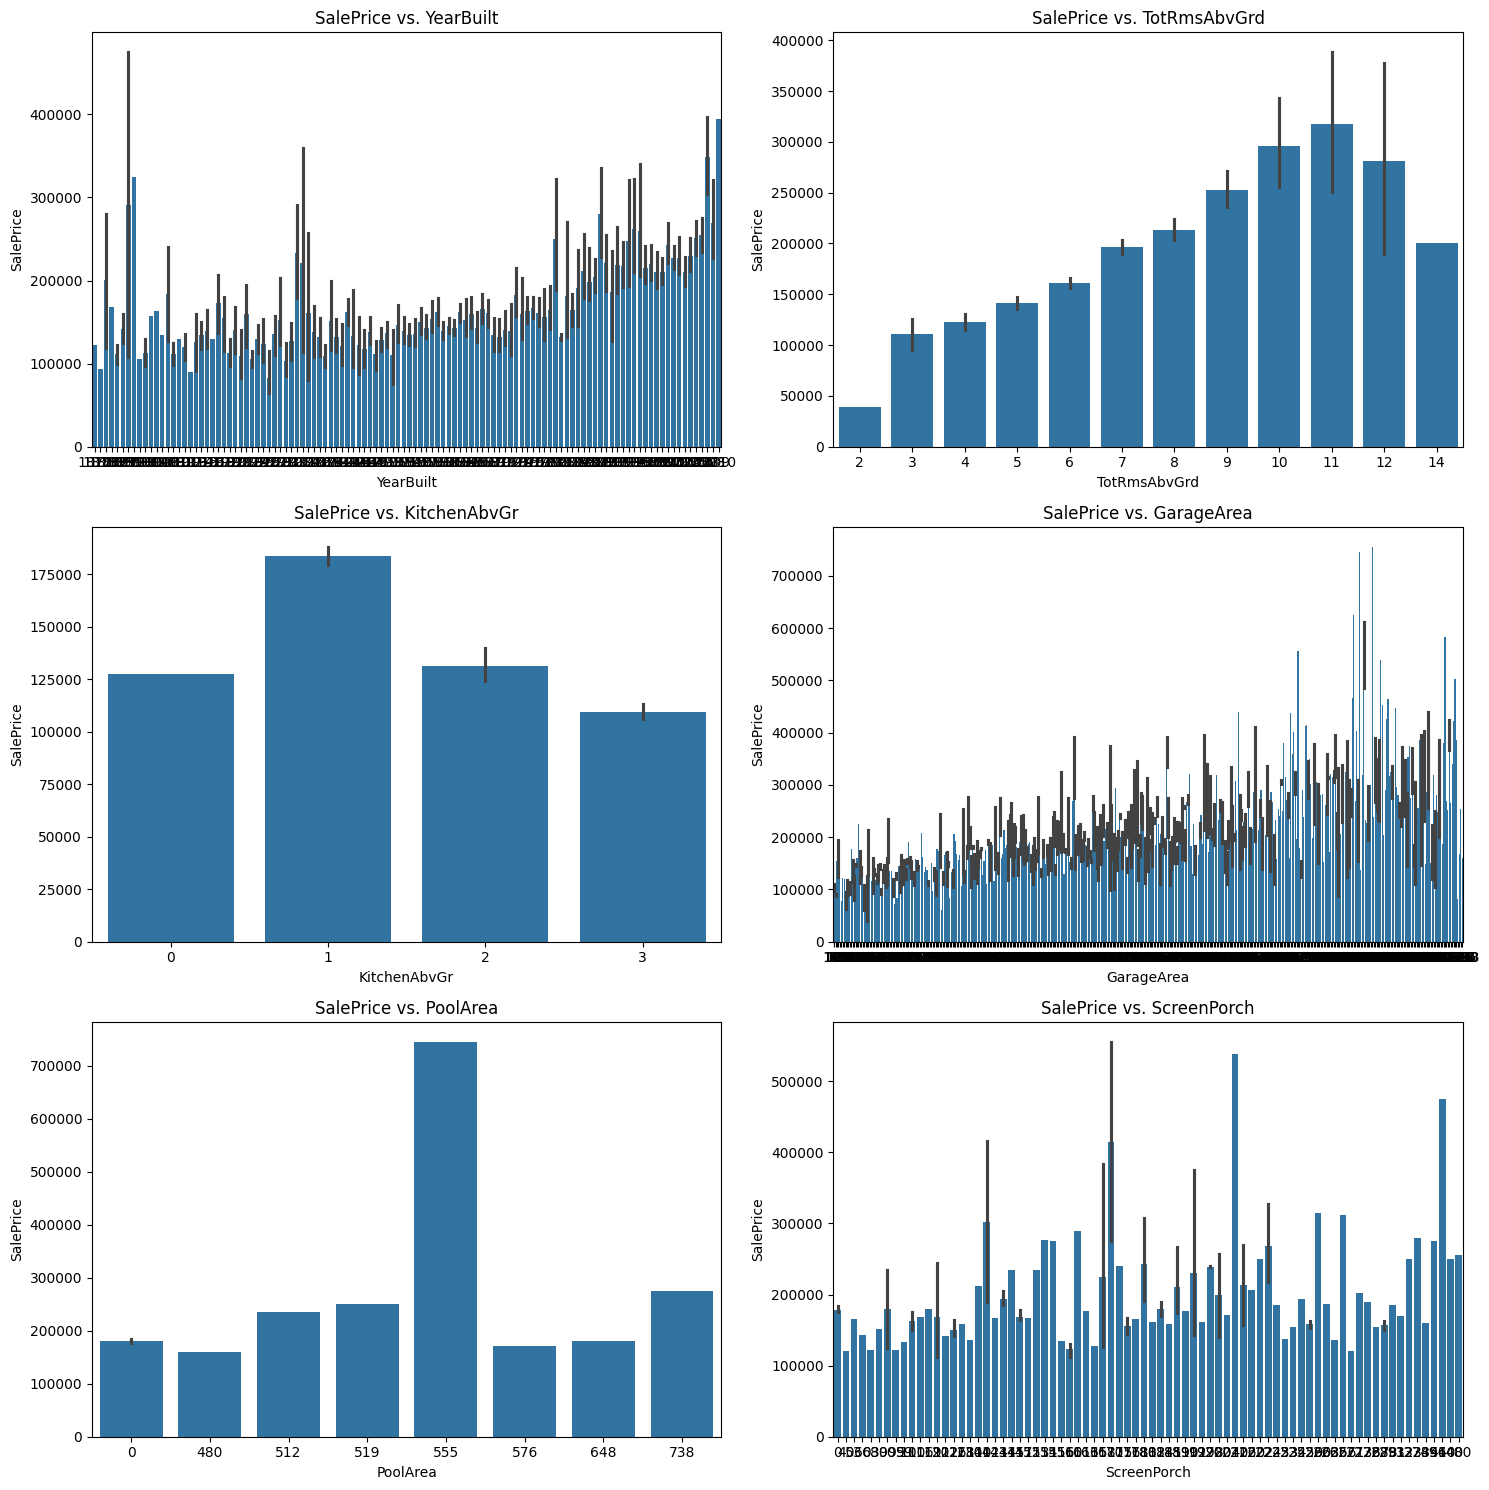

In [17]:
!pip install seaborn matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'coefficients' is calculated as before

# Features of interest (adjust as needed)
features_to_plot = ['YearBuilt', 'TotRmsAbvGrd', 'KitchenAbvGr', 'GarageArea', 'PoolArea', 'ScreenPorch']

# Number of features to plot
num_features = len(features_to_plot)

# Calculate number of rows and columns for subplots
num_cols = 2  # You can adjust this for the desired layout
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Iterate through features and create bar plots
for i, feature in enumerate(features_to_plot):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.barplot(data=df, x=feature, y='SalePrice', ax=ax)
    ax.set_title(f'SalePrice vs. {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [13]:
# Define features and target
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(pd.get_dummies(df.drop(['TotRmsAbvGrd','MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','ExterCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','SaleCondition','SaleType','BsmtFinType1','MiscFeature','Fence','PoolQC','PavedDrive','GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','Functional','KitchenQual','Electrical','CentralAir','HeatingQC'], axis=1)))
X = pd.DataFrame(X_imputed, columns=imputer.get_feature_names_out())
y = df['TotRmsAbvGrd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.linear_model import Ridge
# model = Ridge(alpha=1.0)  # Adjust alpha for tuning
# model.fit(X_train, y_train)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.61
R-squared: 0.77


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # Import the scaler

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Scale the training data - NEW CODE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the model on the training data
clf.fit(X_train_scaled, y_train)

# Scale the testing data using the same scaler - NEW CODE
X_test_scaled = scaler.transform(X_test)

# Make predictions on the testing data
y_pred = clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree Classifier: {accuracy:.2f}')

Accuracy of Decision Tree Classifier: 0.45


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_clf.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_rf = rf_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest Classifier: {accuracy_rf:.2f}')

Accuracy of Random Forest Classifier: 0.54


In [ ]:
print(y_pred[0:10])
print(y_test.iloc[0:10])

[ 6 10  4  7  7  3  8  7  5  5]
892     6
1105    9
413     5
522     7
1036    6
614     3
218     8
1160    7
649     3
887     8
Name: TotRmsAbvGrd, dtype: int64


In [ ]:
# Get the feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

# Sort the coefficients by absolute value (magnitude)
coefficients = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index)

# Display the coefficients
print("Feature Importance:\n", coefficients.to_markdown(index=False))

Feature Importance:
 | Feature            |   Coefficient |
|:-------------------|--------------:|
| KitchenAbvGr       |   1.03393     |
| BedroomAbvGr       |   0.671102    |
| RoofStyle_Shed     |   0.493556    |
| RoofStyle_Flat     |  -0.46101     |
| ExterQual_Ex       |   0.421695    |
| MasVnrType_Stone   |   0.363048    |
| BsmtCond_Gd        |   0.302728    |
| RoofStyle_Gambrel  |   0.26991     |
| BsmtQual_Fa        |   0.25723     |
| BsmtCond_TA        |   0.236675    |
| RoofStyle_Mansard  |  -0.235954    |
| ExterQual_Gd       |  -0.189889    |
| BsmtCond_Po        |  -0.188344    |
| MasVnrType_BrkFace |   0.17593     |
| GarageCars         |   0.153352    |
| Foundation_BrkTil  |   0.152148    |
| Foundation_Stone   |  -0.134802    |
| ExterQual_Fa       |  -0.133706    |
| BsmtQual_Ex        |   0.12623     |
| ExterQual_TA       |  -0.0980994   |
| Foundation_Slab    |  -0.0963549   |
| RoofStyle_Gable    |  -0.0927917   |
| BsmtHalfBath       |  -0.0864596   |
| Fo

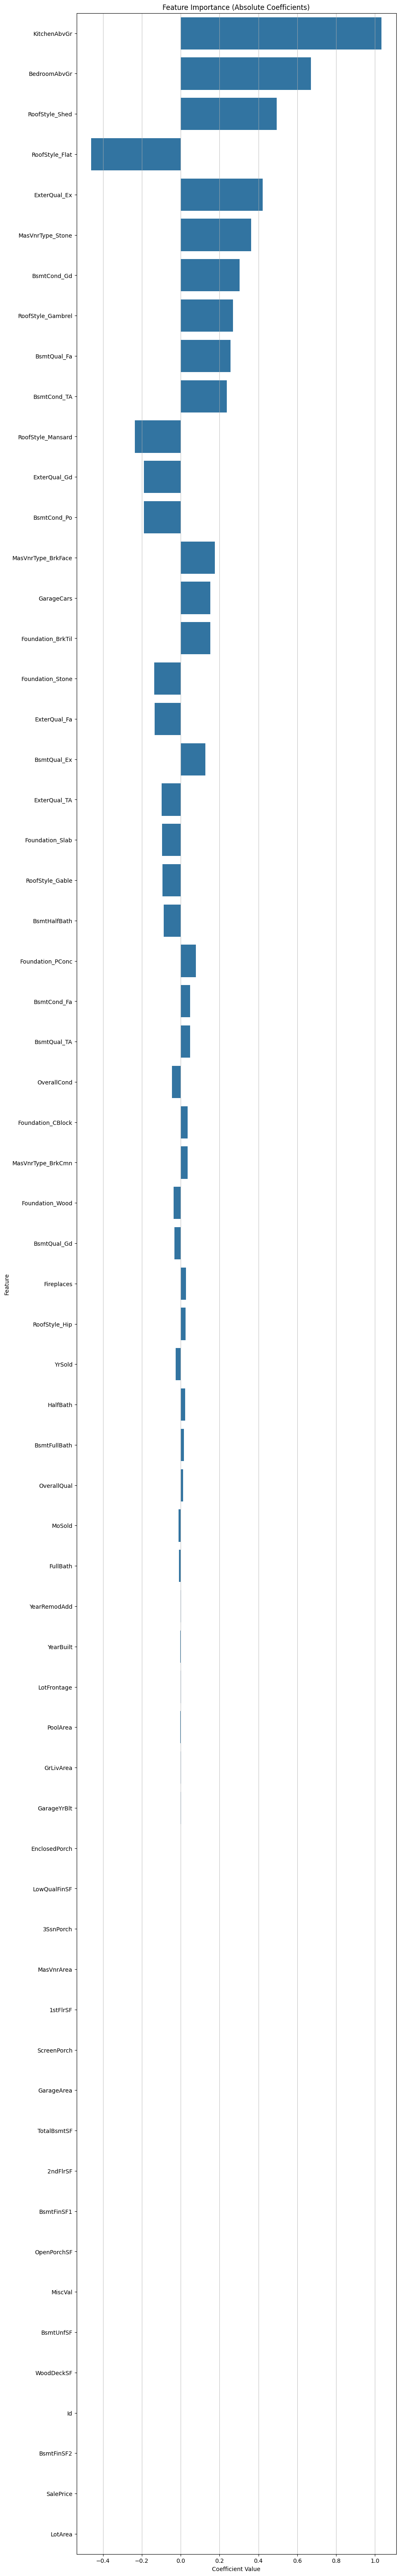

In [ ]:
 #Visualize feature importance
plt.figure(figsize=(10,80))
sns.barplot(data=coefficients, x='Coefficient', y='Feature')
plt.title('Feature Importance (Absolute Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', alpha=0.75)
plt.show()